In [1]:
#@title Import Library

import pandas as pd  # Pandas untuk manipulasi dan analisis data
pd.options.mode.chained_assignment = None  # Menonaktifkan peringatan chaining
import numpy as np  # NumPy untuk komputasi numerik
seed = 0
np.random.seed(seed)  # Mengatur seed untuk reproduktibilitas
import matplotlib.pyplot as plt  # Matplotlib untuk visualisasi data
import seaborn as sns  # Seaborn untuk visualisasi data statistik, mengatur gaya visualisasi
from sklearn.metrics import accuracy_score

import datetime as dt  # Manipulasi data waktu dan tanggal
import re  # Modul untuk bekerja dengan ekspresi reguler
import string  # Berisi konstanta string, seperti tanda baca
from nltk.tokenize import word_tokenize  # Tokenisasi teks
from nltk.corpus import stopwords  # Daftar kata-kata berhenti dalam teks

!pip install sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory  # Stemming (penghilangan imbuhan kata) dalam bahasa Indonesia
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory  # Menghapus kata-kata berhenti dalam bahasa Indonesia

from wordcloud import WordCloud  # Membuat visualisasi berbentuk awan kata (word cloud) dari teks

import nltk  # Import pustaka NLTK (Natural Language Toolkit).
nltk.download('punkt')  # Mengunduh dataset yang diperlukan untuk tokenisasi teks.
nltk.download('stopwords')  # Mengunduh dataset yang berisi daftar kata-kata berhenti (stopwords) dalam berbagai bahasa.

!pip install gensim

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# drive url = https://drive.google.com/file/d/1L17mWkyoYPovG8ISnJ-_SLvmShEvFUGZ/view?usp=sharing
url = 'https://drive.google.com/uc?export=download&id=1L17mWkyoYPovG8ISnJ-_SLvmShEvFUGZ'
data = pd.read_csv(url)

data.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,13b09075-4551-48f5-bd64-660e419b67e1,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Cuma ganti device hp saja dan ribetnya minta a...,1,22,4.7.3,2025-10-05 04:09:01,"Mohon maaf atas ketidaknyamanan Bapak/Ibu, apa...",2025-10-05 04:18:31,4.7.3
1,a32d2465-5df1-4219-af1e-8bc5ee9bc655,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,digunakan susah dan ribet. juga masih ada bebe...,1,23,4.7.3,2025-09-30 06:30:22,"Mohon maaf atas ketidaknyamanan Bapak/Ibu, kam...",2025-09-30 09:27:33,4.7.3
2,146fdc2f-8136-4313-9992-3512952f365e,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,aplikasinya baik dan mudah sampai hari ini bar...,4,6,4.7.3,2025-09-30 02:55:14,"Mohon maaf atas ketidaknyamanan Bapak/Ibu, kam...",2025-09-30 04:01:37,4.7.3
3,4d4d853c-0728-4d20-9c26-2c7310608ed7,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Update terbaru membuat aplikasi tidak dapat di...,1,38,4.7.3,2025-09-22 04:48:51,"Mohon maaf atas kendala yang Bapak/Ibu alami, ...",2025-09-22 04:52:08,4.7.3
4,95fe172a-d449-43f5-97fd-b7e3244803ac,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Setelah verivikasi SMS konfirmasi ID rekening,...",1,10,4.7.3,2025-09-29 20:52:02,"Mohon maaf atas ketidaknyamanan Bapak/Ibu, kam...",2025-09-30 01:47:11,4.7.3


In [3]:
clean_df = data.drop_duplicates()
clean_df = clean_df.dropna()

clean_df.shape

(124963, 11)

# Teks Preprocessing

In [4]:
import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

def cleaningText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # menghapus mention
    text = re.sub(r'#[A-Za-z0-9]+', '', text) # menghapus hashtag
    text = re.sub(r'RT[\s]', '', text) # menghapus RT
    text = re.sub(r"http\S+", '', text) # menghapus link
    text = re.sub(r'[0-9]+', '', text) # menghapus angka
    text = re.sub(r'[^\w\s]', '', text) # menghapus karakter selain huruf dan angka

    text = text.replace('\n', ' ') # mengganti baris baru dengan spasi
    text = text.translate(str.maketrans('', '', string.punctuation)) # menghapus semua tanda baca
    text = text.strip(' ') # menghapus karakter spasi dari kiri dan kanan teks
    return text

def casefoldingText(text): # Mengubah semua karakter dalam teks menjadi huruf kecil
    text = text.lower()
    return text

def tokenizingText(text): # Memecah atau membagi string, teks menjadi daftar token
    text = word_tokenize(text)
    return text

def filteringText(text): # Menghapus stopwords dalam teks
    listStopwords = set(stopwords.words('indonesian'))
    listStopwords1 = set(stopwords.words('english'))
    listStopwords.update(listStopwords1)
    listStopwords.update(['iya','yaa','gak','nya','na','sih','ku',"di","ga","ya","gaa","loh","kah","woi","woii","woy"])
    filtered = []
    for txt in text:
        if txt not in listStopwords:
            filtered.append(txt)
    text = filtered
    return text

def stemmingText(text): # Mengurangi kata ke bentuk dasarnya yang menghilangkan imbuhan awalan dan akhiran atau ke akar kata
    # Membuat objek stemmer
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()

    # Memecah teks menjadi daftar kata
    words = text.split()

    # Menerapkan stemming pada setiap kata dalam daftar
    stemmed_words = [stemmer.stem(word) for word in words]

    # Menggabungkan kata-kata yang telah distem
    stemmed_text = ' '.join(stemmed_words)

    return stemmed_text

def toSentence(list_words): # Mengubah daftar kata menjadi kalimat
    sentence = ' '.join(word for word in list_words)
    return sentence

In [5]:
slangwords = {
    # umum
    "@": "di", "yg": "yang", "dgn": "dengan", "gk": "tidak", "ga": "tidak", "nggak": "tidak",
    "tdk": "tidak", "ngga": "tidak", "bgt": "banget", "bener": "benar", "bgd": "banget",
    "dpt": "dapat", "aja": "saja", "aj": "saja", "ajaib": "aneh", "nih": "ini", "nihh": "ini",
    "dong": "", "deh": "", "lah": "", "sih": "",

    # aktivitas
    "mkn": "makan", "mknya": "makannya", "minum": "minum", "beliin": "belikan", "ngeliat": "melihat",
    "ngeliatin": "melihat", "liat": "lihat", "ngantuk": "kantuk", "turu": "tidur", "tdr": "tidur",

    # waktu
    "abis": "habis", "sblm": "sebelum", "sdh": "sudah", "udh": "sudah", "udah": "sudah",
    "blm": "belum", "skrng": "sekarang", "skrg": "sekarang", "ntar": "nanti", "tggu": "tunggu",

    # ekspresi
    "hehe": "", "haha": "", "wkwk": "", "wkwwk": "", "huhu": "", "lol": "", "btw": "ngomong-ngomong",
    "cm": "cuma", "cuma": "hanya", "tp": "tapi", "tpi": "tapi", "sm": "sama", "sama2": "sama-sama",
    "plis": "tolong", "pls": "tolong", "thx": "terima kasih", "makasih": "terima kasih",
    "tq": "terima kasih", "tx": "terima kasih", "makasi": "terima kasih",

    # jual beli
    "wtb": "beli", "wts": "jual", "wtt": "tukar", "nego": "negosiasi", "cod": "bayar di tempat",
    "ongkir": "ongkos kirim", "barangny": "barangnya",

    # singkatan sosmed
    "idk": "tidak tahu", "imo": "menurutku", "brb": "segera kembali", "bcs": "karena",
    "asap": "secepatnya", "omg": "ya Tuhan", "u": "kamu", "ur": "kamu", "r": "adalah",
}

def fix_slangwords(text):
    words = text.split()
    fixed_words = []

    for word in words:
        if word.lower() in slangwords:
            fixed_words.append(slangwords[word.lower()])
        else:
            fixed_words.append(word)

    fixed_text = ' '.join(fixed_words)
    return fixed_text

In [6]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [7]:
# Membersihkan teks dan menyimpannya di kolom 'text_clean'
clean_df['text_clean'] = clean_df['content'].apply(cleaningText)

# Mengubah huruf dalam teks menjadi huruf kecil dan menyimpannya di 'text_casefoldingText'
clean_df['text_casefoldingText'] = clean_df['text_clean'].apply(casefoldingText)

# Mengganti kata-kata slang dengan kata-kata standar dan menyimpannya di 'text_slangwords'
clean_df['text_slangwords'] = clean_df['text_casefoldingText'].apply(fix_slangwords)

# Memecah teks menjadi token (kata-kata) dan menyimpannya di 'text_tokenizingText'
clean_df['text_tokenizingText'] = clean_df['text_slangwords'].apply(tokenizingText)

# Menghapus kata-kata stop (kata-kata umum) dan menyimpannya di 'text_stopword'
clean_df['text_stopword'] = clean_df['text_tokenizingText'].apply(filteringText)

# Menggabungkan token-token menjadi kalimat dan menyimpannya di 'text_akhir'
clean_df['text_akhir'] = clean_df['text_stopword'].apply(toSentence)

In [8]:
clean_df

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,text_clean,text_casefoldingText,text_slangwords,text_tokenizingText,text_stopword,text_akhir
0,13b09075-4551-48f5-bd64-660e419b67e1,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Cuma ganti device hp saja dan ribetnya minta a...,1,22,4.7.3,2025-10-05 04:09:01,"Mohon maaf atas ketidaknyamanan Bapak/Ibu, apa...",2025-10-05 04:18:31,4.7.3,Cuma ganti device hp saja dan ribetnya minta a...,cuma ganti device hp saja dan ribetnya minta a...,hanya ganti device hp saja dan ribetnya minta ...,"[hanya, ganti, device, hp, saja, dan, ribetnya...","[ganti, device, hp, ribetnya, ampun, pas, veri...",ganti device hp ribetnya ampun pas verifikasi ...
1,a32d2465-5df1-4219-af1e-8bc5ee9bc655,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,digunakan susah dan ribet. juga masih ada bebe...,1,23,4.7.3,2025-09-30 06:30:22,"Mohon maaf atas ketidaknyamanan Bapak/Ibu, kam...",2025-09-30 09:27:33,4.7.3,digunakan susah dan ribet juga masih ada beber...,digunakan susah dan ribet juga masih ada beber...,digunakan susah dan ribet juga masih ada beber...,"[digunakan, susah, dan, ribet, juga, masih, ad...","[susah, ribet, error, transaksi, rekening, asl...",susah ribet error transaksi rekening asli peng...
2,146fdc2f-8136-4313-9992-3512952f365e,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,aplikasinya baik dan mudah sampai hari ini bar...,4,6,4.7.3,2025-09-30 02:55:14,"Mohon maaf atas ketidaknyamanan Bapak/Ibu, kam...",2025-09-30 04:01:37,4.7.3,aplikasinya baik dan mudah sampai hari ini bar...,aplikasinya baik dan mudah sampai hari ini bar...,aplikasinya baik dan mudah sampai hari ini bar...,"[aplikasinya, baik, dan, mudah, sampai, hari, ...","[aplikasinya, mudah, kendala, masuk, pilihan, ...",aplikasinya mudah kendala masuk pilihan menu t...
3,4d4d853c-0728-4d20-9c26-2c7310608ed7,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Update terbaru membuat aplikasi tidak dapat di...,1,38,4.7.3,2025-09-22 04:48:51,"Mohon maaf atas kendala yang Bapak/Ibu alami, ...",2025-09-22 04:52:08,4.7.3,Update terbaru membuat aplikasi tidak dapat di...,update terbaru membuat aplikasi tidak dapat di...,update terbaru membuat aplikasi tidak dapat di...,"[update, terbaru, membuat, aplikasi, tidak, da...","[update, terbaru, aplikasi, menyalakan, fitur,...",update terbaru aplikasi menyalakan fitur akses...
4,95fe172a-d449-43f5-97fd-b7e3244803ac,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Setelah verivikasi SMS konfirmasi ID rekening,...",1,10,4.7.3,2025-09-29 20:52:02,"Mohon maaf atas ketidaknyamanan Bapak/Ibu, kam...",2025-09-30 01:47:11,4.7.3,Setelah verivikasi SMS konfirmasi ID rekening ...,setelah verivikasi sms konfirmasi id rekening ...,setelah verivikasi sms konfirmasi id rekening ...,"[setelah, verivikasi, sms, konfirmasi, id, rek...","[verivikasi, sms, konfirmasi, id, rekening, mu...",verivikasi sms konfirmasi id rekening muncul i...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161993,ee58d6d9-9eb9-4130-8822-1ffba8176ac2,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Bagaimana cara memakai BCA mobile ketika ganti...,5,0,2.9.1,2022-07-20 07:56:55,"Dengan senang hati kami informasikan, mhn mema...",2022-07-20 08:51:39,2.9.1,Bagaimana cara memakai BCA mobile ketika ganti hp,bagaimana cara memakai bca mobile ketika ganti hp,bagaimana cara memakai bca mobile ketika ganti hp,"[bagaimana, cara, memakai, bca, mobile, ketika...","[memakai, bca, mobile, ganti, hp]",memakai bca mobile ganti hp
161995,ebbfeb25-dcfb-4c2d-9cbe-7eec89812109,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Banyak membantu,5,0,2.2.0,2019-09-01 02:26:12,Terima kasih atas ulasannya. Semoga fasilitas ...,2019-09-01 07:15:21,2.2.0,Banyak membantu,banyak membantu,banyak membantu,"[banyak, membantu]",[membantu],membantu
161996,2ca37a11-961a-495

In [9]:
import csv
import requests
from io import StringIO

# Membaca data kamus kata-kata positif dari GitHub
lexicon_positive = dict()

response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_positive.csv')
# Mengirim permintaan HTTP untuk mendapatkan file CSV dari GitHub

if response.status_code == 200:
    # Jika permintaan berhasil
    reader = csv.reader(StringIO(response.text), delimiter=',')
    # Membaca teks respons sebagai file CSV menggunakan pembaca CSV dengan pemisah koma

    for row in reader:
        # Mengulangi setiap baris dalam file CSV
        lexicon_positive[row[0]] = int(row[1])
        # Menambahkan kata-kata positif dan skornya ke dalam kamus lexicon_positive
else:
    print("Failed to fetch positive lexicon data")

# Membaca data kamus kata-kata negatif dari GitHub
lexicon_negative = dict()

response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_negative.csv')
# Mengirim permintaan HTTP untuk mendapatkan file CSV dari GitHub

if response.status_code == 200:
    # Jika permintaan berhasil
    reader = csv.reader(StringIO(response.text), delimiter=',')
    # Membaca teks respons sebagai file CSV menggunakan pembaca CSV dengan pemisah koma

    for row in reader:
        # Mengulangi setiap baris dalam file CSV
        lexicon_negative[row[0]] = int(row[1])
        # Menambahkan kata-kata negatif dan skornya dalam kamus lexicon_negative
else:
    print("Failed to fetch negative lexicon data")

In [10]:
# --- Fungsi Sentiment Analysis 3-Kelas ---
def sentiment_analysis_lexicon_indonesia(text):
    score = 0

    for word in text:
        if word in lexicon_positive:
            score += lexicon_positive[word]
        elif word in lexicon_negative:
            score += lexicon_negative[word]

    # Menentukan label berdasarkan skor
    if score > 1:
        polarity = 'positive'
    elif score < -1:
        polarity = 'negative'
    else:
        polarity = 'neutral'

    return score, polarity

In [11]:
results = clean_df['text_stopword'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
clean_df['polarity_score'] = results[0]
clean_df['polarity'] = results[1]
print(clean_df['polarity'].value_counts())

polarity
positive    75268
negative    26549
neutral     23146
Name: count, dtype: int64


/tmp/ipython-input-3674230096.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='polarity', data=clean_df, palette='viridis')


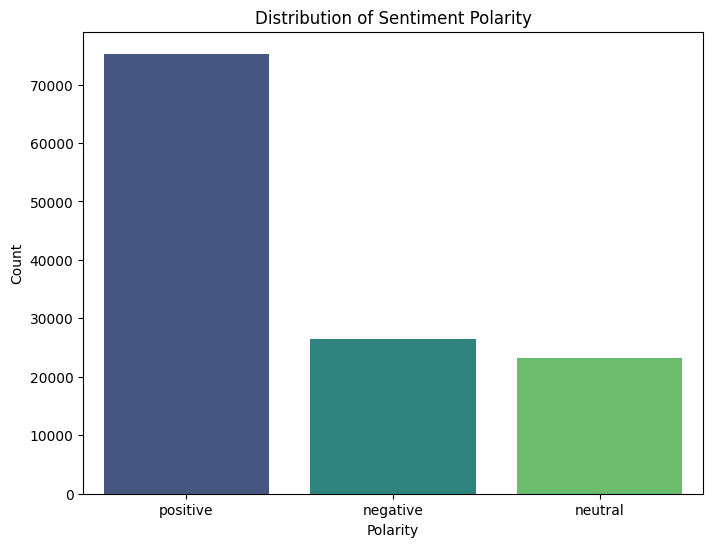

polarity
positive    75268
negative    26549
neutral     23146
Name: count, dtype: int64


In [12]:
# Visualize the distribution of 'polarity' using a bar chart
plt.figure(figsize=(8, 6))
sns.countplot(x='polarity', data=clean_df, palette='viridis')
plt.title('Distribution of Sentiment Polarity')
plt.xlabel('Polarity')
plt.ylabel('Count')
plt.show()

print(clean_df['polarity'].value_counts())

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [14]:
X = clean_df['text_akhir']
y = clean_df['polarity']

# Modeling

## Pelatihan: RF,    Ekstraksi Fitur: TF-IDF,    Pembagian Data: 80/20

In [15]:
# Ekstraksi fitur dengan TF-IDF
tfidf = TfidfVectorizer(max_features=5000, min_df=0.001, max_df=0.8 )
X_tfidf = tfidf.fit_transform(X)

In [16]:
# splitting data
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

In [17]:
from sklearn.ensemble import RandomForestClassifier

# Membuat objek model Random Forest
random_forest = RandomForestClassifier(
    n_estimators=200,
    min_samples_split=5,     # butuh minimal 5 sample untuk split
    max_features='sqrt',     # subset fitur acak
    n_jobs=-1,
    random_state=42
)

# Melatih model Random Forest pada data pelatihan
random_forest.fit(X_train, y_train)

# Prediksi sentimen pada data pelatihan dan data uji
y_pred_train_rf = random_forest.predict(X_train.toarray())
y_pred_test_rf = random_forest.predict(X_test.toarray())

# Evaluasi akurasi model Random Forest
accuracy_train_rf = accuracy_score(y_pred_train_rf, y_train)
accuracy_test_rf = accuracy_score(y_pred_test_rf, y_test)

# Menampilkan akurasi
print('Random Forest - accuracy_train:', accuracy_train_rf)
print('Random Forest - accuracy_test:', accuracy_test_rf)

Random Forest - accuracy_train: 0.9893368010403121
Random Forest - accuracy_test: 0.8509982795182651


## Pelatihan: LR,    Ekstraksi Fitur: TF-IDF,    Pembagian Data: 70/30

In [18]:
# Ekstraksi fitur dengan TF-IDF
tfidf = TfidfVectorizer(max_features=10000, min_df=0.001, max_df=0.8 )
X_tfidf = tfidf.fit_transform(X)

In [19]:
# splitting data
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.3, random_state=42)

In [20]:
from sklearn.linear_model import LogisticRegression

# Membuat objek model lr
lr_model = LogisticRegression(max_iter=1000)

lr_model.fit(X_train.toarray(), y_train)

y_pred_train_lr = lr_model.predict(X_train)
y_pred_test_lr = lr_model.predict(X_test)

accuracy_train_lr = accuracy_score(y_train, y_pred_train_lr)
accuracy_test_lr = accuracy_score(y_test, y_pred_test_lr)

print('lr - accuracy_train:', accuracy_train_lr)
print('lr - accuracy_test:', accuracy_test_lr)

lr - accuracy_train: 0.9118366600361251
lr - accuracy_test: 0.9012777081277175


## Pelatihan: LR,    Ekstraksi Fitur: Word2vec,    Pembagian Data: 80/20

In [21]:
from gensim.models import Word2Vec
from sklearn.ensemble import RandomForestClassifier

# Tokenisasi sederhana
tokenized_sentences = [text.split() for text in X]

# Melatih model Word2Vec
w2v_model = Word2Vec(
    sentences=tokenized_sentences,
    vector_size=100,     # ukuran embedding (bisa 100–300)
    window=5,
    min_count=2,         # abaikan kata yang muncul <2 kali
    workers=-1
)

# Fungsi untuk mendapatkan rata-rata vektor setiap kalimat
def sentence_vector(sentence, model):
    words = [word for word in sentence if word in model.wv]
    if len(words) == 0:
        return np.zeros(model.vector_size)
    return np.mean(model.wv[words], axis=0)


In [27]:
# Konversi seluruh data ke bentuk vektor
X_vectors = np.array([sentence_vector(sent, w2v_model) for sent in tokenized_sentences])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_vectors, y, test_size=0.2, random_state=42)

In [29]:
from sklearn.ensemble import RandomForestClassifier

# Membuat objek model Random Forest
random_forest = RandomForestClassifier(
    n_estimators=200,
    min_samples_split=5,     # butuh minimal 5 sample untuk split
    max_features='sqrt',     # subset fitur acak
    n_jobs=-1,
    random_state=42
)

# Melatih model Random Forest pada data pelatihan
random_forest.fit(X_train, y_train)

# Prediksi sentimen pada data pelatihan dan data uji
y_pred_train_rf = random_forest.predict(X_train)
y_pred_test_rf = random_forest.predict(X_test)

# Evaluasi akurasi model Random Forest
accuracy_train_rf = accuracy_score(y_pred_train_rf, y_train)
accuracy_test_rf = accuracy_score(y_pred_test_rf, y_test)

# Menampilkan akurasi
print('Random Forest - accuracy_train:', accuracy_train_rf)
print('Random Forest - accuracy_test:', accuracy_test_rf)

Random Forest - accuracy_train: 0.9998999699909973
Random Forest - accuracy_test: 0.7357660144840555
